In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoder = LabelEncoder()
data['BFPcase'] = label_encoder.fit_transform(data['BFPcase'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['BMIcase'] = label_encoder.fit_transform(data['BMIcase'])

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Normalize/scale numerical features
scaler = StandardScaler()
data_no_outliers[numerical_features] = scaler.fit_transform(data_no_outliers[numerical_features])

# Define subsets of features
feature_subsets = [
    ['Weight', 'Height', 'BMI'],
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage'],
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age'],
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan'],
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan', 'Gender'],
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan', 'Gender', 'BMIcase'],
    data_no_outliers.columns.tolist()  # All features including categorical ones
]

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

# Initialize results dataframe
results = []

# Evaluate each subset of features
for i, subset in enumerate(feature_subsets):
    X = data_no_outliers[subset]
    y = data_no_outliers['BFPcase']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the SVM classifier
    svm_classifier = SVC(kernel='linear', C=1, random_state=42)
    svm_classifier.fit(X_train, y_train)

    # Predict the test set results
    y_pred = svm_classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    sensitivity = classification_rep['weighted avg']['recall'] * 100  # Convert to percentage
    specificity = specificity_score(y_test, y_pred) * 100  # Convert to percentage

    # Append results
    results.append({
        'Subset Size': len(subset),
        'Features': ', '.join(subset),
        'Accuracy (%)': accuracy,
        'Sensitivity (%)': sensitivity,
        'Specificity (%)': specificity
    })

# Convert results to dataframe
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


   Subset Size                                           Features  \
0            3                                Weight, Height, BMI   
1            4           Weight, Height, BMI, Body Fat Percentage   
2            5      Weight, Height, BMI, Body Fat Percentage, Age   
3            6  Weight, Height, BMI, Body Fat Percentage, Age,...   
4            7  Weight, Height, BMI, Body Fat Percentage, Age,...   
5            8  Weight, Height, BMI, Body Fat Percentage, Age,...   
6            9  Weight, Height, BMI, Body Fat Percentage, BFPc...   

   Accuracy (%)  Sensitivity (%)  Specificity (%)  
0     76.175549        76.175549        97.765363  
1     90.491118        90.491118       100.000000  
2     98.955068        98.955068       100.000000  
3     98.746082        98.746082       100.000000  
4     98.537095        98.537095       100.000000  
5     98.746082        98.746082       100.000000  
6    100.000000       100.000000       100.000000  


In [ ]:
# Determine the best subset
best_subset = results_df.loc[results_df['Accuracy (%)'].idxmax()]

print("\nBest Subset:")
print(best_subset)

# Use the best subset for SVM classification
best_features = best_subset['Features'].split(', ')

X = data_no_outliers[best_features]
y = data_no_outliers['BFPcase']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
classification_rep = classification_report(y_test, y_pred, output_dict=True)
sensitivity = classification_rep['weighted avg']['recall'] * 100  # Convert to percentage
specificity = specificity_score(y_test, y_pred) * 100  # Convert to percentage

print(f"SVM Classifier - Accuracy: {accuracy:.2f}%, Sensitivity: {sensitivity:.2f}%, Specificity: {specificity:.2f}%")



Best Subset:
Subset Size                                                        9
Features           Weight, Height, BMI, Body Fat Percentage, BFPc...
Accuracy (%)                                                   100.0
Sensitivity (%)                                                100.0
Specificity (%)                                                100.0
Name: 6, dtype: object
SVM Classifier - Accuracy: 100.00%, Sensitivity: 100.00%, Specificity: 100.00%


In [ ]:
# Initialize and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), max_iter=500, random_state=42, early_stopping=True)
mlp_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100  # Convert to percentage
classification_rep_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
sensitivity_mlp = classification_rep_mlp['weighted avg']['recall'] * 100  # Convert to percentage
specificity_mlp = specificity_score(y_test, y_pred_mlp) * 100  # Convert to percentage

print(f"MLP Classifier - Accuracy: {accuracy_mlp:.2f}%, Sensitivity: {sensitivity_mlp:.2f}%, Specificity: {specificity_mlp:.2f}%")


MLP Classifier - Accuracy: 99.79%, Sensitivity: 99.79%, Specificity: 100.00%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

chosen_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age']
# Extract features and target variable
X = data_no_outliers[chosen_features]
y = data_no_outliers['BFPcase']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Initialize classifiers for Voting Classifier
svm_classifier = SVC(kernel=best_params['kernel'], C=best_params['C'], degree=best_params['degree'], gamma=best_params['gamma'], probability=True)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('rf', rf_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)

# Evaluating the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

# Displaying the results
print(f"Accuracy of Voting Classifier: {accuracy_voting * 100:.2f}%")
print("Classification Report for Voting Classifier:\n", classification_report_voting)


Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 99.16%
Accuracy of Voting Classifier: 99.69%
Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       254
           1       1.00      0.98      0.99        59
           2       0.97      1.00      0.98        95
           3       1.00      1.00      1.00       549

    accuracy                           1.00       957
   macro avg       0.99      0.99      0.99       957
weighted avg       1.00      1.00      1.00       957



Missing Values:
 Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64
Original dataset shape: (5000, 9)
Dataset shape after removing outliers: (4782, 9)


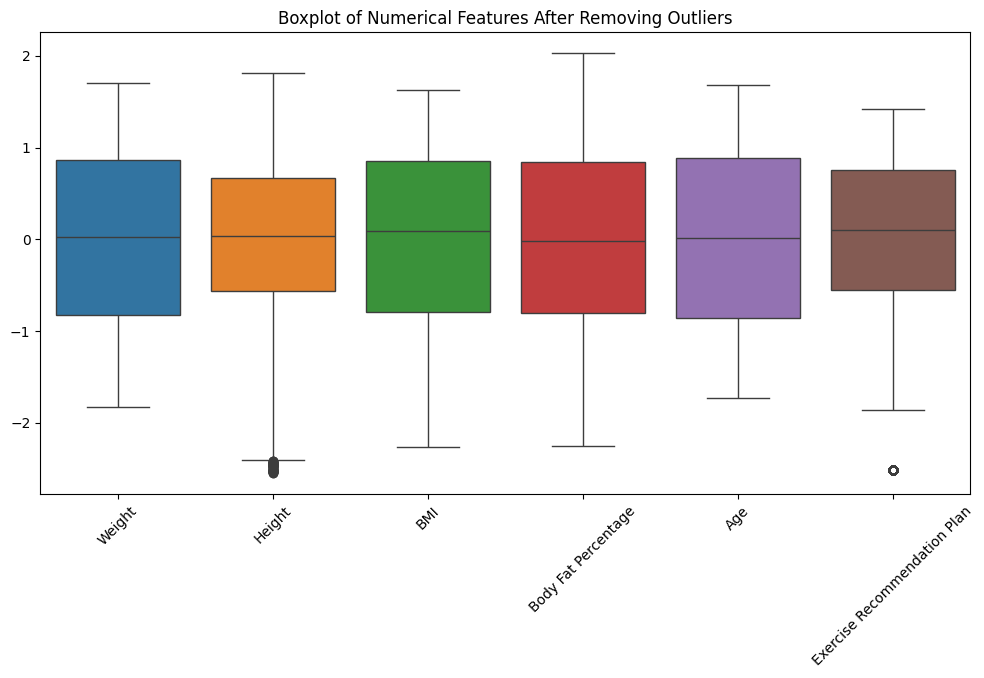

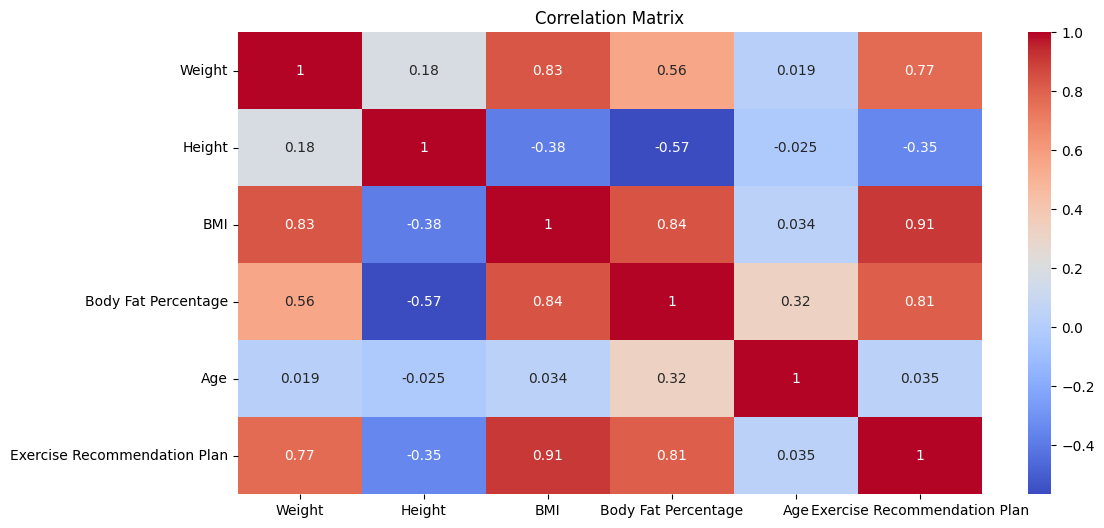

Selected Kernel: linear
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 99.16%
Confusion Matrix for the best SVM model:
 [[250   0   3   1]
 [  0  58   1   0]
 [  0   1  94   0]
 [  2   0   0 547]]


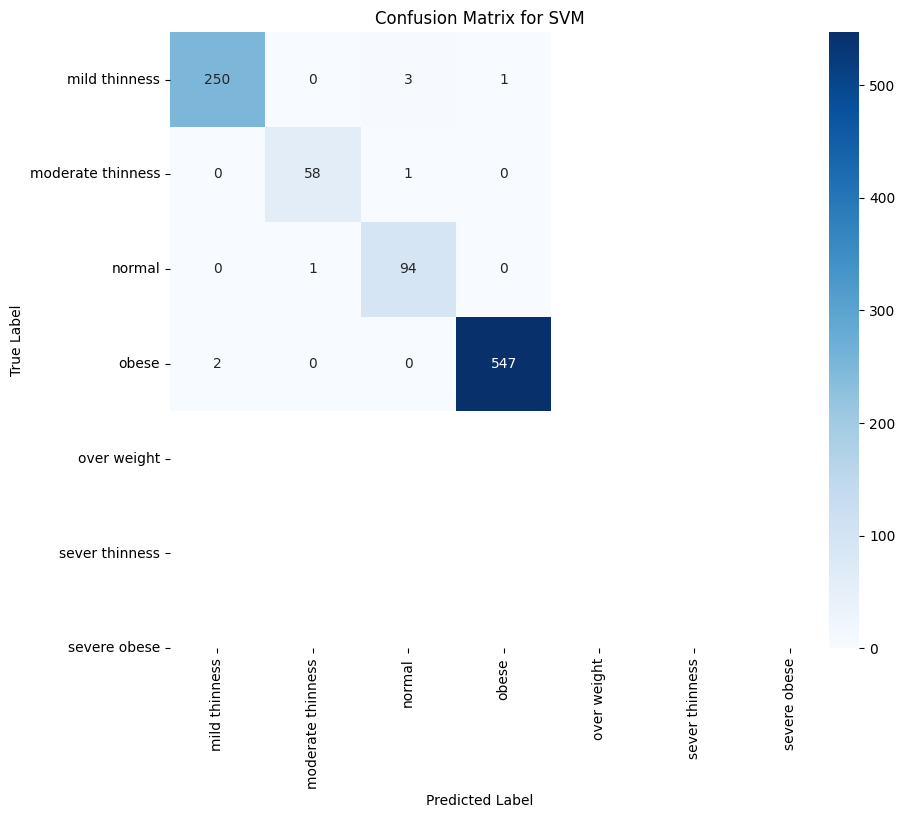

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Display the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {data.shape}")
print(f"Dataset shape after removing outliers: {data_no_outliers.shape}")

# Normalize/scale numerical features
scaler = StandardScaler()
data_no_outliers[numerical_features] = scaler.fit_transform(data_no_outliers[numerical_features])

# Visualization to identify outliers (after outlier removal)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers[numerical_features])
plt.title('Boxplot of Numerical Features After Removing Outliers')
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix: Generate a heatmap to show correlations between features (numeric columns only)
plt.figure(figsize=(12, 6))
numeric_data = data_no_outliers[numerical_features]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Encode categorical features
label_encoder = LabelEncoder()
data_no_outliers['BFPcase'] = label_encoder.fit_transform(data_no_outliers['BFPcase'])
data_no_outliers['Gender'] = label_encoder.fit_transform(data_no_outliers['Gender'])
data_no_outliers['BMIcase'] = label_encoder.fit_transform(data_no_outliers['BMIcase'])

# Define features and target variable
chosen_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age']
X = data_no_outliers[chosen_features]
y = data_no_outliers['BFPcase']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the selected kernel and best parameters
print(f"Selected Kernel: {best_params['kernel']}")
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix for the best SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for the best SVM model:\n", conf_matrix_svm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()


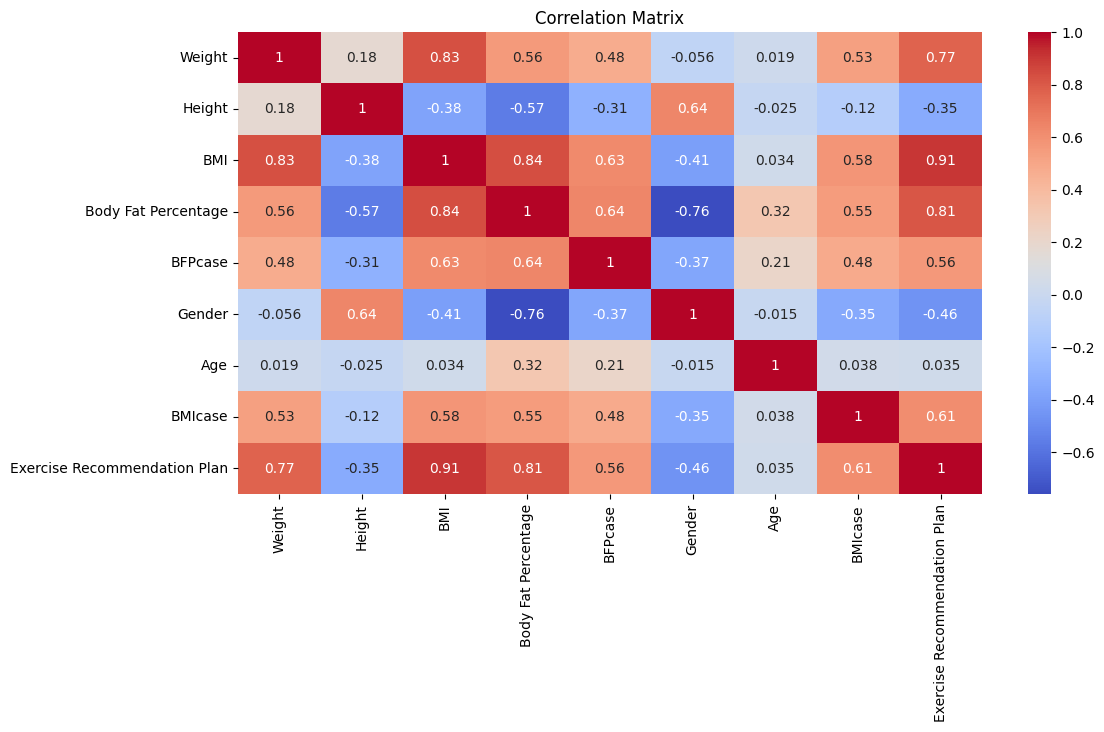

   Subset Size                                           Features  \
0            3                                Weight, Height, BMI   
1            4           Weight, Height, BMI, Body Fat Percentage   
2            5      Weight, Height, BMI, Body Fat Percentage, Age   
3            6  Weight, Height, BMI, Body Fat Percentage, Age,...   
4            7  Weight, Height, BMI, Body Fat Percentage, Age,...   

   Accuracy (%)  Sensitivity (%)  Specificity (%)  
0     76.175549        76.175549        97.765363  
1     90.491118        90.491118       100.000000  
2     98.955068        98.955068       100.000000  
3     98.746082        98.746082       100.000000  
4     98.537095        98.537095       100.000000  

Best Subset:
Subset Size                                                    5
Features           Weight, Height, BMI, Body Fat Percentage, Age
Accuracy (%)                                           98.955068
Sensitivity (%)                                        98.955068

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoder = LabelEncoder()
data['BFPcase'] = label_encoder.fit_transform(data['BFPcase'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['BMIcase'] = label_encoder.fit_transform(data['BMIcase'])

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Normalize/scale numerical features
scaler = StandardScaler()
data_no_outliers[numerical_features] = scaler.fit_transform(data_no_outliers[numerical_features])

# Correlation matrix to identify highly correlated features
plt.figure(figsize=(12, 6))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Initial feature sets to evaluate
feature_subsets = [
    ['Weight', 'Height', 'BMI'],  # 3 features
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage'],  # 4 features
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age'],  # 5 features
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan'],  # 6 features
    ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan', 'Gender'],  # 7 features
]

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

# Evaluate each subset of features
results = []
for subset in feature_subsets:
    X = data_no_outliers[subset]
    y = data_no_outliers['BFPcase']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the SVM classifier
    svm_classifier = SVC(kernel='linear', C=1, random_state=42)
    svm_classifier.fit(X_train, y_train)

    # Predict the test set results
    y_pred = svm_classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    sensitivity = classification_rep['weighted avg']['recall'] * 100  # Convert to percentage
    specificity = specificity_score(y_test, y_pred) * 100  # Convert to percentage

    # Append results
    results.append({
        'Subset Size': len(subset),
        'Features': ', '.join(subset),
        'Accuracy (%)': accuracy,
        'Sensitivity (%)': sensitivity,
        'Specificity (%)': specificity
    })

# Convert results to dataframe
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Select the subset with highest accuracy
best_subset = results_df.loc[results_df['Accuracy (%)'].idxmax()]

print("\nBest Subset:")
print(best_subset)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoder = LabelEncoder()
data['BFPcase'] = label_encoder.fit_transform(data['BFPcase'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['BMIcase'] = label_encoder.fit_transform(data['BMIcase'])

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Normalize/scale numerical features
scaler = StandardScaler()
data_no_outliers[numerical_features] = scaler.fit_transform(data_no_outliers[numerical_features])

# Split the data into features and target variable
X = data_no_outliers.drop('BFPcase', axis=1)
y = data_no_outliers['BFPcase']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Initialize classifiers for Voting Classifier
svm_classifier = SVC(kernel=best_params['kernel'], C=best_params['C'], degree=best_params['degree'], gamma=best_params['gamma'], probability=True)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('rf', rf_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)

# Evaluating the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

# Calculate confusion matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Calculate sensitivity and specificity for each class
def calculate_sensitivity_specificity(conf_matrix):
    TP = np.diag(conf_matrix)
    FP = conf_matrix.sum(axis=0) - TP
    FN = conf_matrix.sum(axis=1) - TP
    TN = conf_matrix.sum() - (FP + FN + TP)

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    return sensitivity, specificity

sensitivity_voting, specificity_voting = calculate_sensitivity_specificity(conf_matrix_voting)

# Displaying the results
print(f"Accuracy of Voting Classifier: {accuracy_voting * 100:.2f}%")
print(f"Sensitivity (Recall) of Voting Classifier: {np.mean(sensitivity_voting) * 100:.2f}%")
print(f"Specificity of Voting Classifier: {np.mean(specificity_voting) * 100:.2f}%")


Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 98.85%
Accuracy of Voting Classifier: 99.69%
Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       254
           1       1.00      0.98      0.99        59
           2       0.97      1.00      0.98        95
           3       1.00      1.00      1.00       549

    accuracy                           1.00       957
   macro avg       0.99      0.99      0.99       957
weighted avg       1.00      1.00      1.00       957

Sensitivity (Recall) of Voting Classifier: 99.38%
Specificity of Voting Classifier: 99.91%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoder = LabelEncoder()
data['BFPcase'] = label_encoder.fit_transform(data['BFPcase'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['BMIcase'] = label_encoder.fit_transform(data['BMIcase'])

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Define categorical features
categorical_features = ['Gender', 'BMIcase']

# Feature engineering pipeline with PCA
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
            ('log', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=5))  # Apply PCA
        ]), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the transformations
data_transformed = preprocessor.fit_transform(data_no_outliers)

# Convert to DataFrame for easier handling
data_transformed_df = pd.DataFrame(data_transformed)

# Display the transformed dataset
print(data_transformed_df.head())

# Extract features and target variable
X = data_transformed_df
y = data_no_outliers['BFPcase']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Initializing classifiers
svm_classifier = SVC(kernel=best_params['kernel'], C=best_params['C'], degree=best_params['degree'], gamma=best_params['gamma'], probability=True)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('rf', rf_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)

# Evaluating the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

# Calculate sensitivity and specificity for multiclass classification
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
sensitivity_voting = []
specificity_voting = []

for i in range(conf_matrix_voting.shape[0]):
    tp = conf_matrix_voting[i, i]
    fn = conf_matrix_voting[i, :].sum() - tp
    fp = conf_matrix_voting[:, i].sum() - tp
    tn = conf_matrix_voting.sum() - (tp + fn + fp)
    sensitivity_voting.append(tp / (tp + fn) if (tp + fn) != 0 else 0)
    specificity_voting.append(tn / (tn + fp) if (tn + fp) != 0 else 0)

sensitivity_voting = np.mean(sensitivity_voting)
specificity_voting = np.mean(specificity_voting)

# Displaying the results
print(f"Accuracy of Voting Classifier: {accuracy_voting * 100:.2f}%")

print(f"Sensitivity (Recall) of Voting Classifier: {sensitivity_voting * 100:.2f}%")
print(f"Specificity of Voting Classifier: {specificity_voting * 100:.2f}%")


         0         1         2         3         4    5    6    7    8    9   \
0  2.638647  1.774590 -0.554790 -0.288353 -0.384108  0.0  1.0  0.0  0.0  1.0   
1  4.387016  3.213197 -1.954780 -0.968011  0.149888  0.0  1.0  0.0  0.0  1.0   
2 -3.311371 -2.046373  0.036572  0.731849  0.157393  1.0  0.0  0.0  0.0  0.0   
3 -1.572620  0.186778 -0.446269  0.168646 -0.777026  0.0  1.0  0.0  0.0  0.0   
4  4.086094  4.066868  1.260205 -0.294540 -0.715295  0.0  1.0  0.0  0.0  1.0   

    10   11   12   13  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  1.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 99.37%
Accuracy of Voting Classifier: 98.54%
Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       254
           1       0.98      0.97      0.97        59
           2       0.94      0.9

Missing Values:
 Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64
Original dataset shape: (5000, 9)
Dataset shape after removing outliers: (4782, 9)


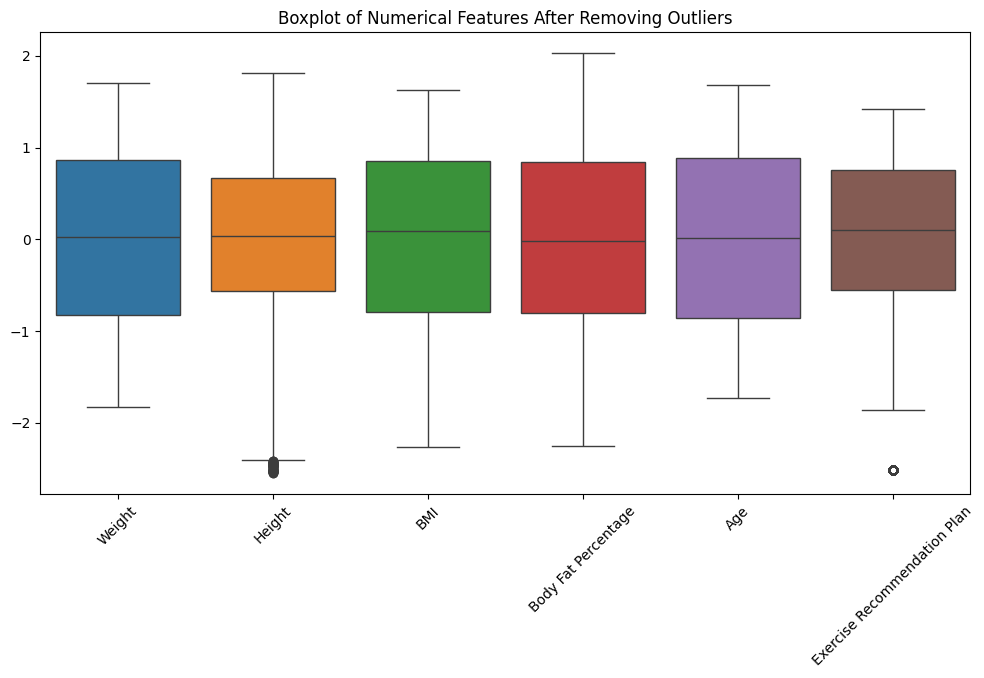

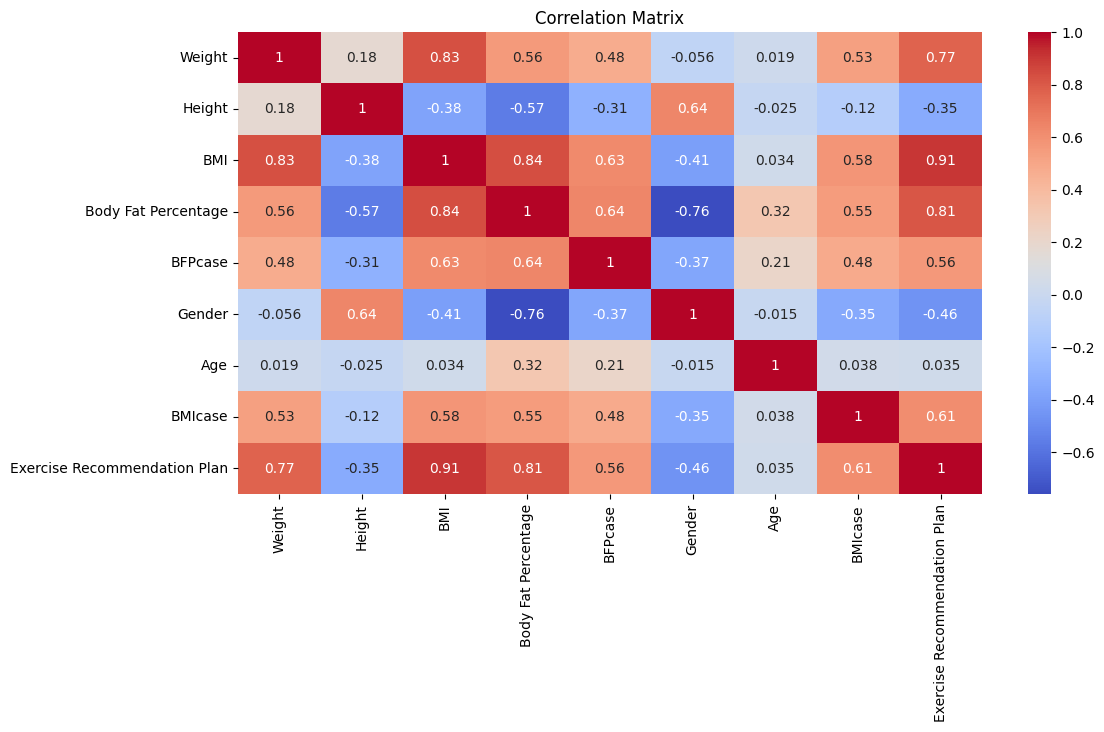

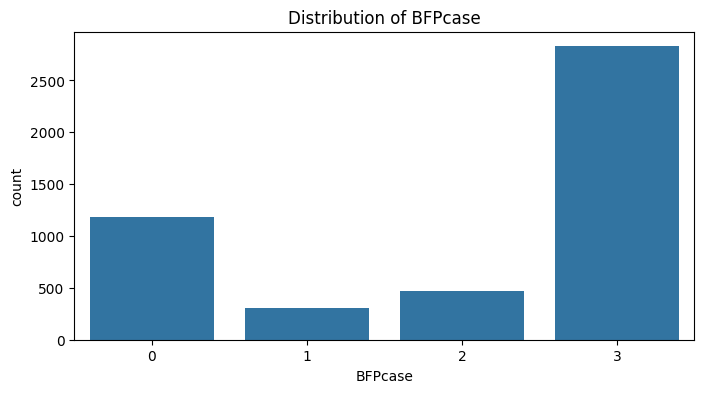

Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 98.85%


ValueError: too many values to unpack (expected 4)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import numpy as np

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Encode categorical features
label_encoder = LabelEncoder()
data['BFPcase'] = label_encoder.fit_transform(data['BFPcase'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['BMIcase'] = label_encoder.fit_transform(data['BMIcase'])

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Display the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {data.shape}")
print(f"Dataset shape after removing outliers: {data_no_outliers.shape}")

# Normalize/scale numerical features
scaler = StandardScaler()
data_no_outliers[numerical_features] = scaler.fit_transform(data_no_outliers[numerical_features])

# 6. Visualization to identify outliers (after outlier removal)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers[numerical_features])
plt.title('Boxplot of Numerical Features After Removing Outliers')
plt.xticks(rotation=45)
plt.show()

# 7. Correlation Matrix: Generate a heatmap to show correlations between features
plt.figure(figsize=(12, 6))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 8. Distribution of Target Variable (BFPcase): Generate a count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='BFPcase', data=data_no_outliers)
plt.title('Distribution of BFPcase')
plt.show()

# Split the data into features and target variable
X = data_no_outliers.drop('BFPcase', axis=1)
y = data_no_outliers['BFPcase']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Initialize classifiers for Voting Classifier
svm_classifier = SVC(kernel=best_params['kernel'], C=best_params['C'], degree=best_params['degree'], gamma=best_params['gamma'], probability=True)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('rf', rf_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)

# Evaluating the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

# Calculate sensitivity and specificity
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
tn, fp, fn, tp = conf_matrix_voting[:4].ravel()
sensitivity_voting = tp / (tp + fn)
specificity_voting = tn / (tn + fp)

# Displaying the results
print(f"Accuracy of Voting Classifier: {accuracy_voting * 100:.2f}%")
print("Classification Report for Voting Classifier:\n", classification_report_voting)
print(f"Sensitivity (Recall) of Voting Classifier: {sensitivity_voting * 100:.2f}%")
print(f"Specificity of Voting Classifier: {specificity_voting * 100:.2f}%")

# Create and display the confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred)
display_labels = label_encoder.inverse_transform(list(set(y_test)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('SVM Classifier Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K-Means - Adjusted Rand Index (ARI): 0.3652
K-Means - Normalized Mutual Information (NMI): 0.4417
K-Means - Silhouette Score: 0.2769
K-Means - Davies-Bouldin Index: 1.2321
K-Means - Accuracy: 0.7767
Hierarchical - Adjusted Rand Index (ARI): 0.2539
Hierarchical - Normalized Mutual Information (NMI): 0.3647
Hierarchical - Silhouette Score: 0.1832
Hierarchical - Davies-Bouldin Index: 1.4664
Hierarchical - Accuracy: 0.7166
GMM - Adjusted Rand Index (ARI): 0.3122
GMM - Normalized Mutual Information (NMI): 0.3801
GMM - Silhouette Score: 0.2100
GMM - Davies-Bouldin Index: 1.5189
GMM - Accuracy: 0.7532
Agglomerative - Adjusted Rand Index (ARI): 0.2539
Agglomerative - Normalized Mutual Information (NMI): 0.3647
Agglomerative - Silhouette Score: 0.1832
Agglomerative - Davies-Bouldin Index: 1.4664
Agglomerative - Accuracy: 0.7166
Mean Shift resulted in a single cluster. Metrics cannot be computed.
DBSCAN - Adjusted Rand Index (ARI): 1.0000
DBSCAN - Normalized Mutual Information (NMI): 1.0000
DBSC

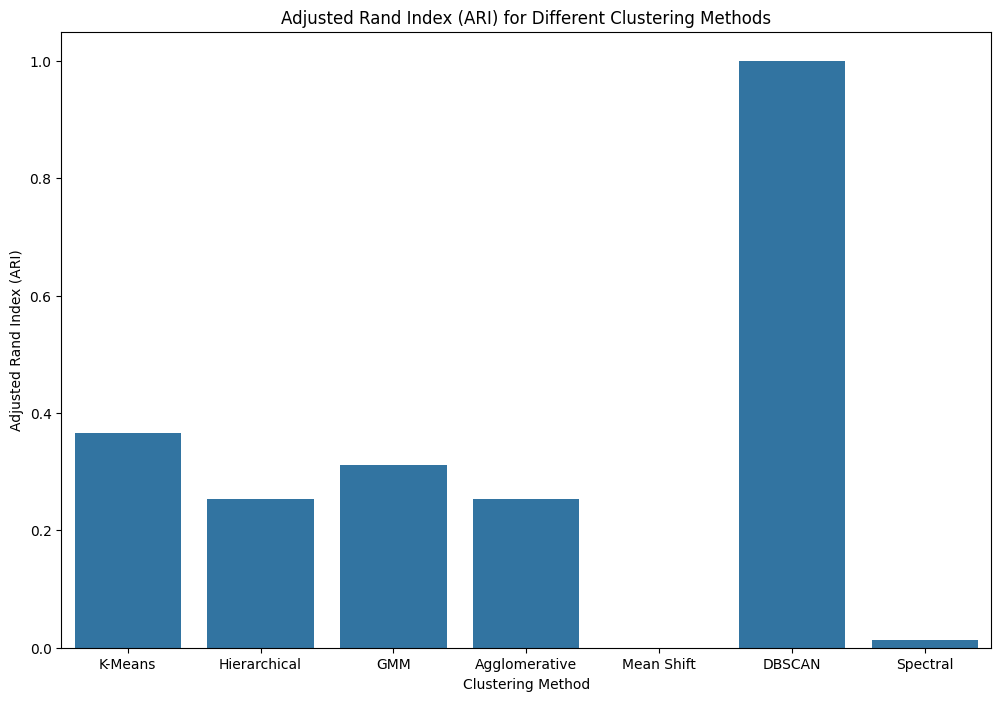

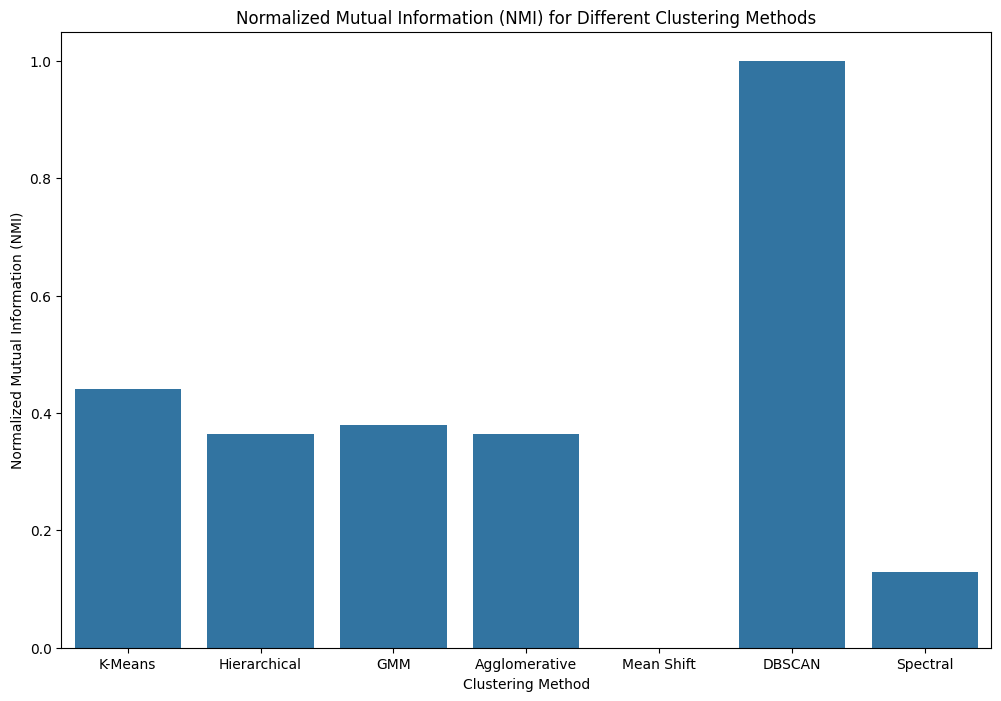

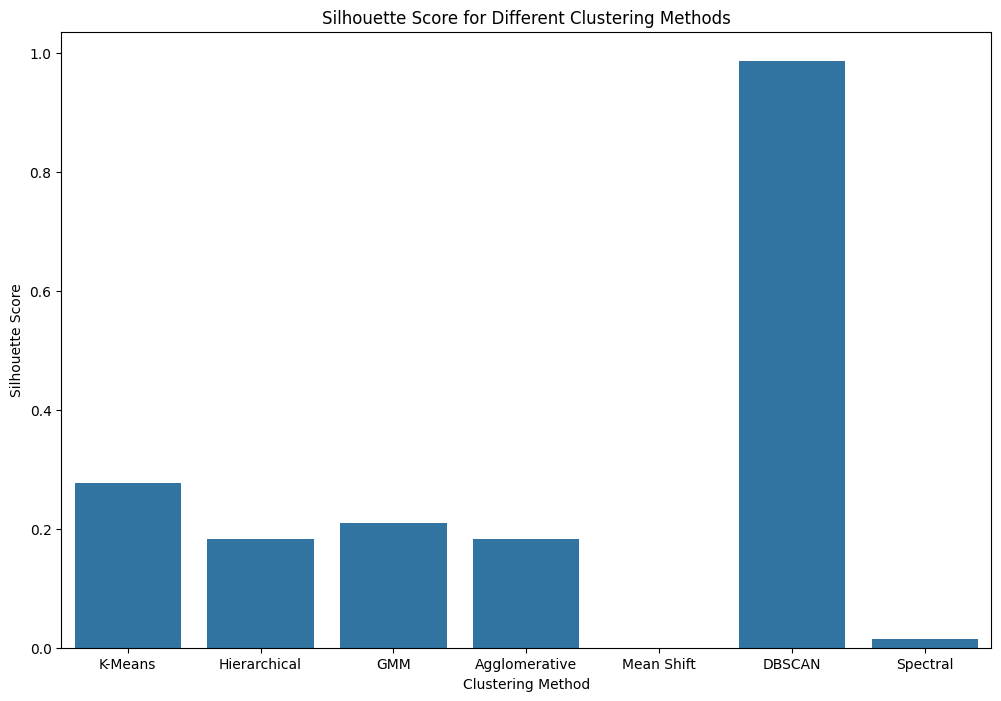

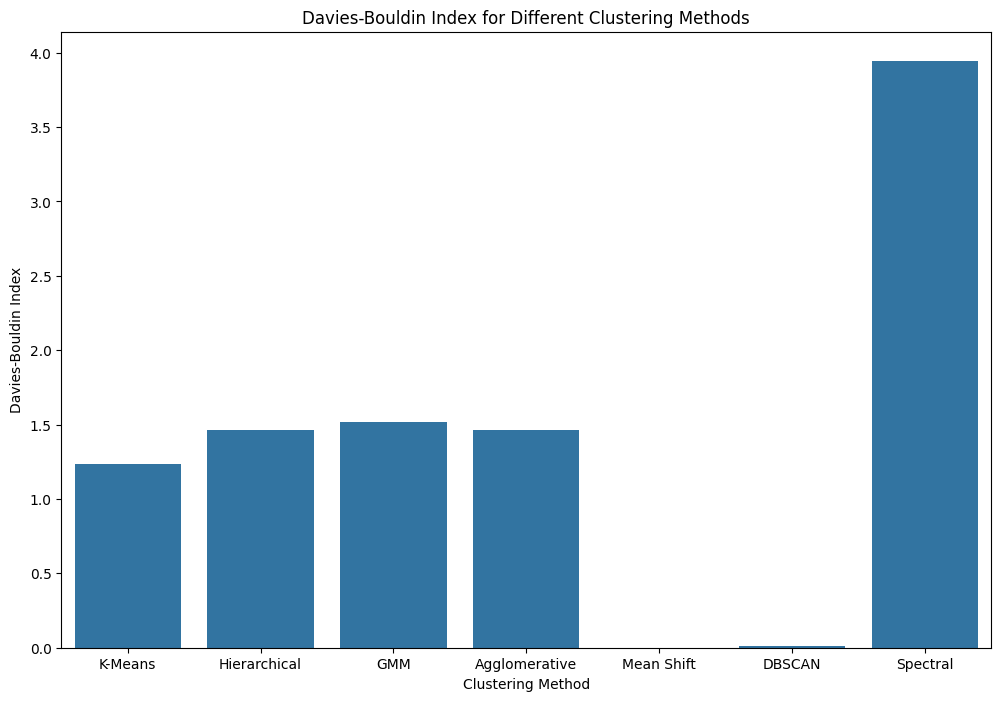

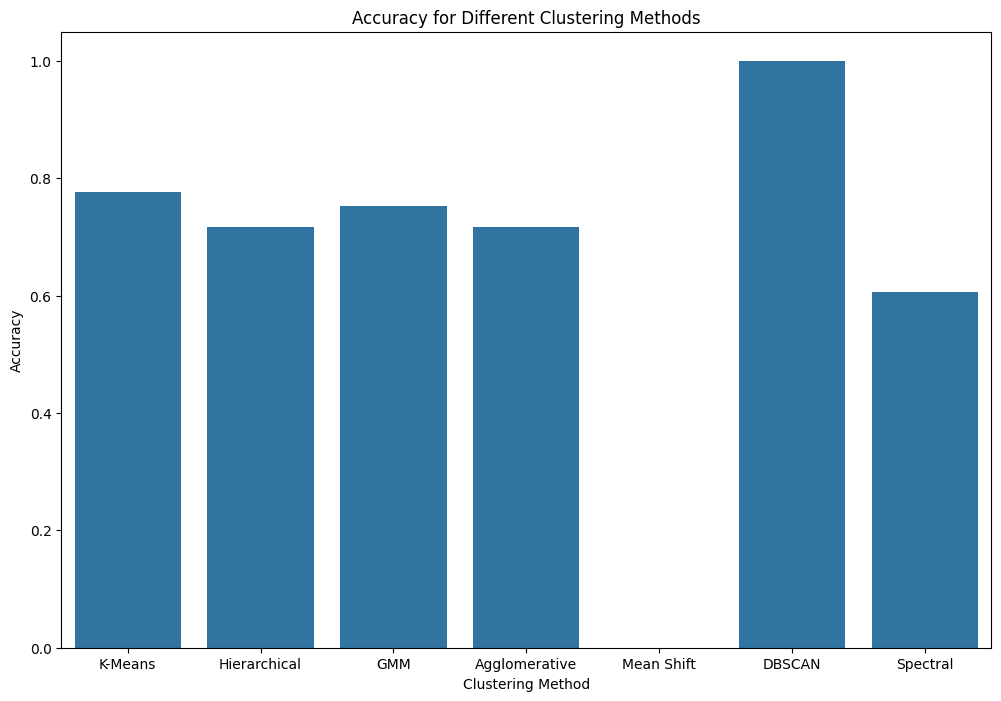

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, davies_bouldin_score, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoder = LabelEncoder()
data['BFPcase'] = label_encoder.fit_transform(data['BFPcase'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['BMIcase'] = label_encoder.fit_transform(data['BMIcase'])

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Define categorical features
categorical_features = ['Gender', 'BMIcase']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Feature engineering pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
            ('log', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=5))  # Apply PCA
        ]), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ]
)

# Apply the transformations
data_transformed = preprocessor.fit_transform(data_no_outliers)

# Extract features and target variable
X = data_transformed
y = data_no_outliers['BFPcase']

def calculate_clustering_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mapped_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        true_labels = y_true[mask]
        most_frequent_label = np.bincount(true_labels).argmax()
        mapped_labels[mask] = most_frequent_label
    return accuracy_score(y_true, mapped_labels)

# K-Means Clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X)
ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
nmi_kmeans = normalized_mutual_info_score(y, cluster_labels_kmeans)
silhouette_kmeans = silhouette_score(X, cluster_labels_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X, cluster_labels_kmeans)
accuracy_kmeans = calculate_clustering_accuracy(y, cluster_labels_kmeans)

# Hierarchical Clustering
Z = linkage(X, method='ward')
cluster_labels_hierarchical = fcluster(Z, t=4, criterion='maxclust')
ari_hierarchical = adjusted_rand_score(y, cluster_labels_hierarchical)
nmi_hierarchical = normalized_mutual_info_score(y, cluster_labels_hierarchical)
silhouette_hierarchical = silhouette_score(X, cluster_labels_hierarchical)
davies_bouldin_hierarchical = davies_bouldin_score(X, cluster_labels_hierarchical)
accuracy_hierarchical = calculate_clustering_accuracy(y, cluster_labels_hierarchical)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
cluster_labels_gmm = gmm.fit_predict(X)
ari_gmm = adjusted_rand_score(y, cluster_labels_gmm)
nmi_gmm = normalized_mutual_info_score(y, cluster_labels_gmm)
silhouette_gmm = silhouette_score(X, cluster_labels_gmm)
davies_bouldin_gmm = davies_bouldin_score(X, cluster_labels_gmm)
accuracy_gmm = calculate_clustering_accuracy(y, cluster_labels_gmm)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels_agglo = agglo.fit_predict(X)
ari_agglo = adjusted_rand_score(y, cluster_labels_agglo)
nmi_agglo = normalized_mutual_info_score(y, cluster_labels_agglo)
silhouette_agglo = silhouette_score(X, cluster_labels_agglo)
davies_bouldin_agglo = davies_bouldin_score(X, cluster_labels_agglo)
accuracy_agglo = calculate_clustering_accuracy(y, cluster_labels_agglo)

# Mean Shift Clustering
mean_shift = MeanShift()
cluster_labels_mean_shift = mean_shift.fit_predict(X)
if len(np.unique(cluster_labels_mean_shift)) > 1:
    ari_mean_shift = adjusted_rand_score(y, cluster_labels_mean_shift)
    nmi_mean_shift = normalized_mutual_info_score(y, cluster_labels_mean_shift)
    silhouette_mean_shift = silhouette_score(X, cluster_labels_mean_shift)
    davies_bouldin_mean_shift = davies_bouldin_score(X, cluster_labels_mean_shift)
    accuracy_mean_shift = calculate_clustering_accuracy(y, cluster_labels_mean_shift)
else:
    ari_mean_shift = nmi_mean_shift = silhouette_mean_shift = davies_bouldin_mean_shift = accuracy_mean_shift = None

# DBSCAN Clustering
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(3, 10)
best_ari = -1
best_nmi = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        mask = cluster_labels != -1
        if np.sum(mask) == 0:
            continue
        y_filtered = y[mask].to_numpy()
        cluster_labels_filtered = cluster_labels[mask]
        ari = adjusted_rand_score(y_filtered, cluster_labels_filtered)
        nmi = normalized_mutual_info_score(y_filtered, cluster_labels_filtered)
        if ari > best_ari and nmi > best_nmi:
            best_ari = ari
            best_nmi = nmi
            best_params = (eps, min_samples)

optimal_eps, optimal_min_samples = best_params
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
cluster_labels_optimal = dbscan_optimal.fit_predict(X)
mask_optimal = cluster_labels_optimal != -1
y_filtered_optimal = y[mask_optimal].to_numpy()
cluster_labels_filtered_optimal = cluster_labels_optimal[mask_optimal]
ari_optimal = adjusted_rand_score(y_filtered_optimal, cluster_labels_filtered_optimal)
nmi_optimal = normalized_mutual_info_score(y_filtered_optimal, cluster_labels_filtered_optimal)
silhouette_optimal = silhouette_score(X[mask_optimal], cluster_labels_filtered_optimal)
davies_bouldin_optimal = davies_bouldin_score(X[mask_optimal], cluster_labels_filtered_optimal)
accuracy_dbscan = calculate_clustering_accuracy(y_filtered_optimal, cluster_labels_filtered_optimal)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral.fit_predict(X)
ari_spectral = adjusted_rand_score(y, cluster_labels_spectral)
nmi_spectral = normalized_mutual_info_score(y, cluster_labels_spectral)
silhouette_spectral = silhouette_score(X, cluster_labels_spectral)
davies_bouldin_spectral = davies_bouldin_score(X, cluster_labels_spectral)
accuracy_spectral = calculate_clustering_accuracy(y, cluster_labels_spectral)

# Print metrics for all clustering methods
print(f"K-Means - Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"K-Means - Normalized Mutual Information (NMI): {nmi_kmeans:.4f}")
print(f"K-Means - Silhouette Score: {silhouette_kmeans:.4f}")
print(f"K-Means - Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
print(f"K-Means - Accuracy: {accuracy_kmeans:.4f}")

print(f"Hierarchical - Adjusted Rand Index (ARI): {ari_hierarchical:.4f}")
print(f"Hierarchical - Normalized Mutual Information (NMI): {nmi_hierarchical:.4f}")
print(f"Hierarchical - Silhouette Score: {silhouette_hierarchical:.4f}")
print(f"Hierarchical - Davies-Bouldin Index: {davies_bouldin_hierarchical:.4f}")
print(f"Hierarchical - Accuracy: {accuracy_hierarchical:.4f}")

print(f"GMM - Adjusted Rand Index (ARI): {ari_gmm:.4f}")
print(f"GMM - Normalized Mutual Information (NMI): {nmi_gmm:.4f}")
print(f"GMM - Silhouette Score: {silhouette_gmm:.4f}")
print(f"GMM - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"GMM - Accuracy: {accuracy_gmm:.4f}")

print(f"Agglomerative - Adjusted Rand Index (ARI): {ari_agglo:.4f}")
print(f"Agglomerative - Normalized Mutual Information (NMI): {nmi_agglo:.4f}")
print(f"Agglomerative - Silhouette Score: {silhouette_agglo:.4f}")
print(f"Agglomerative - Davies-Bouldin Index: {davies_bouldin_agglo:.4f}")
print(f"Agglomerative - Accuracy: {accuracy_agglo:.4f}")



print(f"DBSCAN - Adjusted Rand Index (ARI): {ari_optimal:.4f}")
print(f"DBSCAN - Normalized Mutual Information (NMI): {nmi_optimal:.4f}")
print(f"DBSCAN - Silhouette Score: {silhouette_optimal:.4f}")
print(f"DBSCAN - Davies-Bouldin Index: {davies_bouldin_optimal:.4f}")
print(f"DBSCAN - Accuracy: {accuracy_dbscan:.4f}")

print(f"Spectral - Adjusted Rand Index (ARI): {ari_spectral:.4f}")
print(f"Spectral - Normalized Mutual Information (NMI): {nmi_spectral:.4f}")
print(f"Spectral - Silhouette Score: {silhouette_spectral:.4f}")
print(f"Spectral - Davies-Bouldin Index: {davies_bouldin_spectral:.4f}")
print(f"Spectral - Accuracy: {accuracy_spectral:.4f}")

# Summary of Results
results = {
    'Clustering Method': ['K-Means', 'Hierarchical', 'GMM', 'Agglomerative', 'Mean Shift', 'DBSCAN', 'Spectral'],
    'Adjusted Rand Index (ARI)': [ari_kmeans, ari_hierarchical, ari_gmm, ari_agglo, ari_mean_shift, ari_optimal, ari_spectral],
    'Normalized Mutual Information (NMI)': [nmi_kmeans, nmi_hierarchical, nmi_gmm, nmi_agglo, nmi_mean_shift, nmi_optimal, nmi_spectral],
    'Silhouette Score': [silhouette_kmeans, silhouette_hierarchical, silhouette_gmm, silhouette_agglo, silhouette_mean_shift, silhouette_optimal, silhouette_spectral],
    'Davies-Bouldin Index': [davies_bouldin_kmeans, davies_bouldin_hierarchical, davies_bouldin_gmm, davies_bouldin_agglo, davies_bouldin_mean_shift, davies_bouldin_optimal, davies_bouldin_spectral],
    'Accuracy': [accuracy_kmeans, accuracy_hierarchical, accuracy_gmm, accuracy_agglo, accuracy_mean_shift, accuracy_dbscan, accuracy_spectral]
}

summary = pd.DataFrame(results)
print(summary)

# Plot the summary table for better visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Adjusted Rand Index (ARI)', data=summary)
plt.title('Adjusted Rand Index (ARI) for Different Clustering Methods')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Normalized Mutual Information (NMI)', data=summary)
plt.title('Normalized Mutual Information (NMI) for Different Clustering Methods')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Silhouette Score', data=summary)
plt.title('Silhouette Score for Different Clustering Methods')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Davies-Bouldin Index', data=summary)
plt.title('Davies-Bouldin Index for Different Clustering Methods')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Accuracy', data=summary)
plt.title('Accuracy for Different Clustering Methods')
plt.show()



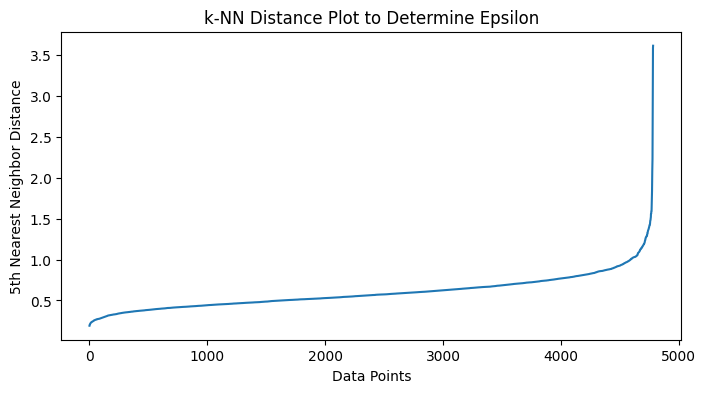

Best ARI: 1.0000, Best NMI: 1.0000
Optimal parameters - eps: 0.1, min_samples: 3
Adjusted Rand Index (ARI) for Optimal DBSCAN: 1.0000
Normalized Mutual Information (NMI) for Optimal DBSCAN: 1.0000
Silhouette Score for Optimal DBSCAN: 0.9869
Davies-Bouldin Index for Optimal DBSCAN: 0.0148


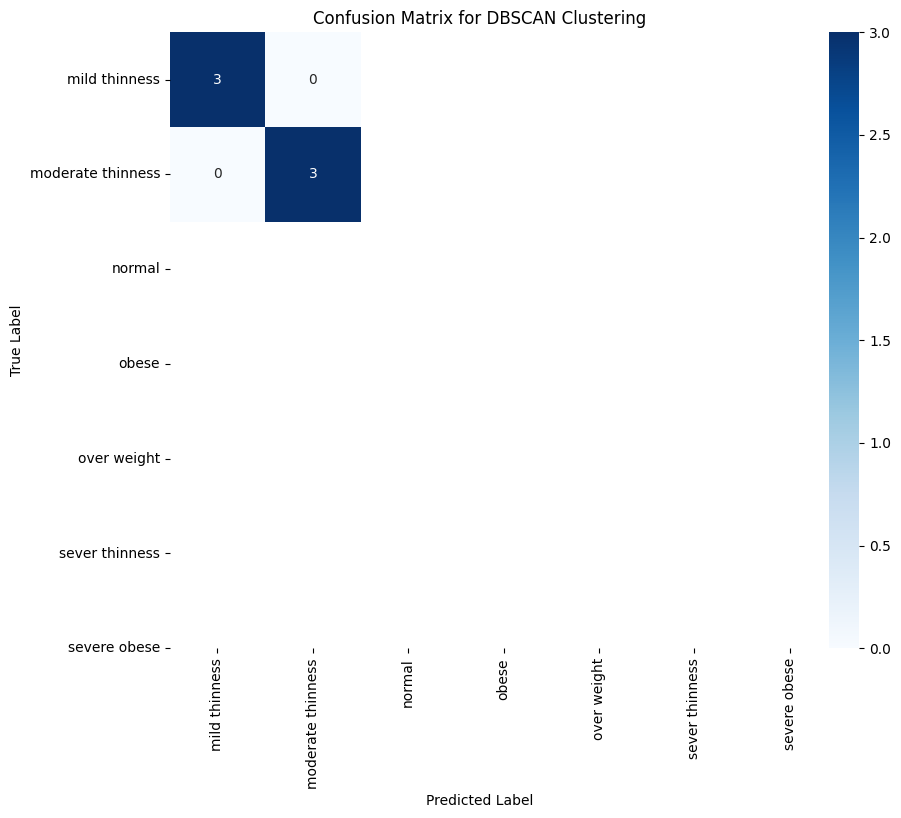

  Clustering Method  Adjusted Rand Index (ARI)  \
0            DBSCAN                        1.0   

   Normalized Mutual Information (NMI)  Silhouette Score  Davies-Bouldin Index  
0                                  1.0          0.986861              0.014766  
150/150 [==============================] - 0s 1ms/step
VAE+DBSCAN clustering resulted in a single cluster. Metrics cannot be computed.
  Clustering Method  Adjusted Rand Index (ARI)  \
0            DBSCAN                        1.0   
1        VAE+DBSCAN                        NaN   

   Normalized Mutual Information (NMI)  Silhouette Score  Davies-Bouldin Index  
0                                  1.0          0.986861              0.014766  
1                                  NaN               NaN                   NaN  


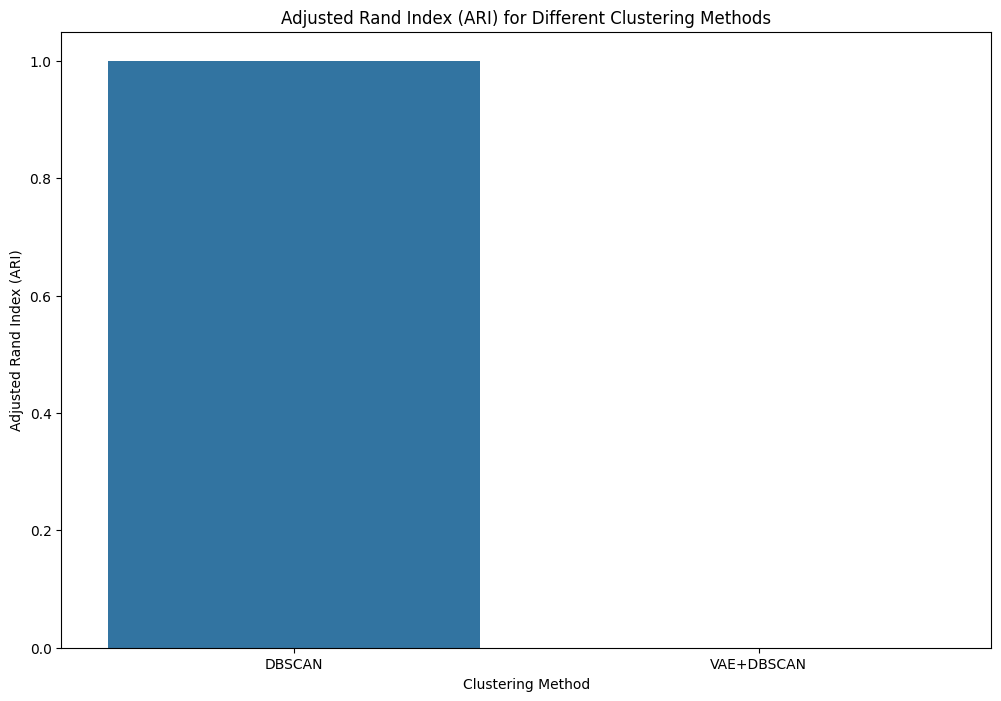

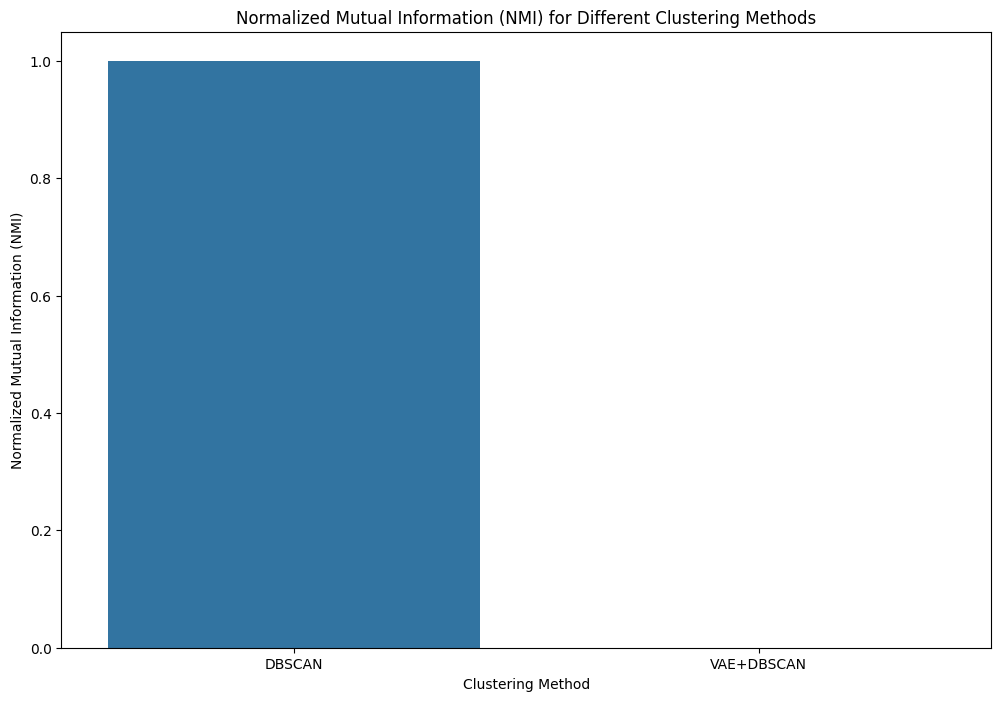

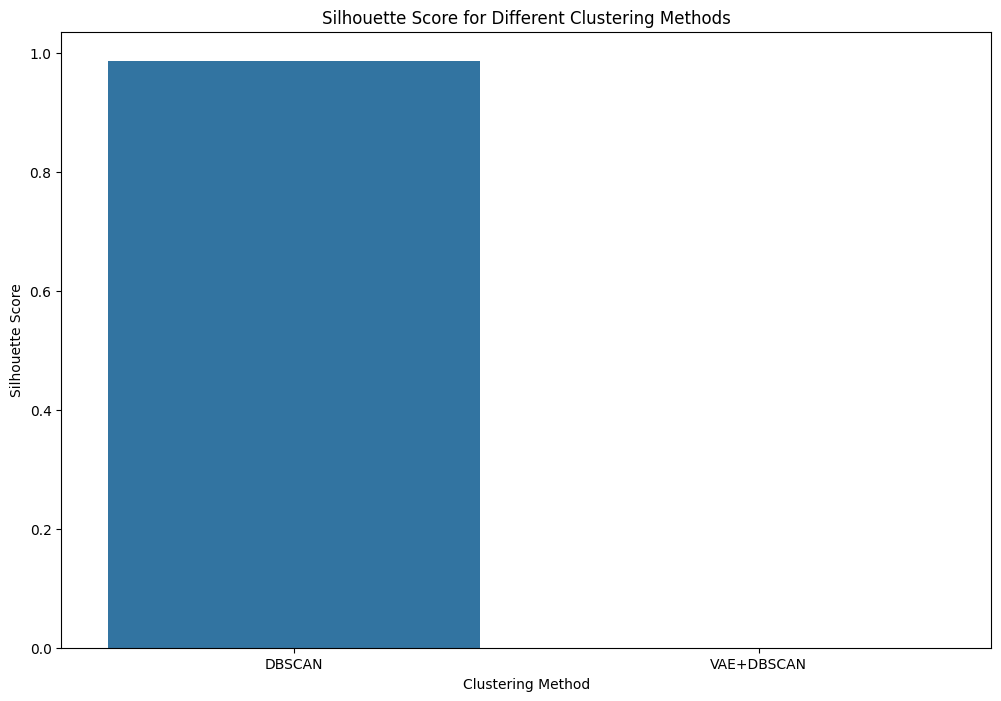

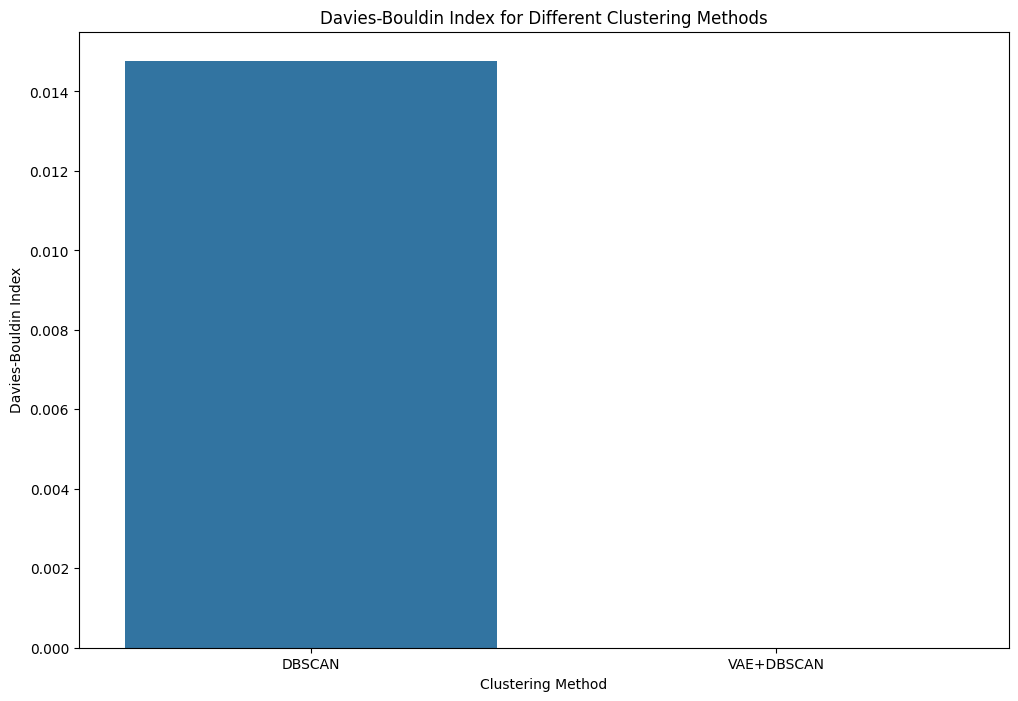

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Input, Dense, Lambda, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Model

# Load the dataset
file_path = 'BFP.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoder = LabelEncoder()
data['BFPcase'] = label_encoder.fit_transform(data['BFPcase'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['BMIcase'] = label_encoder.fit_transform(data['BMIcase'])

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical features
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age', 'Exercise Recommendation Plan']

# Define categorical features
categorical_features = ['Gender', 'BMIcase']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_features)

# Feature engineering pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
            ('log', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=5))  # Apply PCA
        ]), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ]
)

# Apply the transformations
data_transformed = preprocessor.fit_transform(data_no_outliers)

# Extract features and target variable
X = data_transformed
y = data_no_outliers['BFPcase']

# Determine the optimal epsilon (eps) using k-NN distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-NN Distance Plot to Determine Epsilon')
plt.show()

# Grid search for optimal DBSCAN parameters
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(3, 10)

best_ari = -1
best_nmi = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)

        # Filter out noise points for evaluation
        mask = cluster_labels != -1
        if np.sum(mask) == 0:
            continue

        y_filtered = y[mask].to_numpy()  # Ensure conversion to NumPy array
        cluster_labels_filtered = cluster_labels[mask]

        ari = adjusted_rand_score(y_filtered, cluster_labels_filtered)
        nmi = normalized_mutual_info_score(y_filtered, cluster_labels_filtered)

        if ari > best_ari and nmi > best_nmi:
            best_ari = ari
            best_nmi = nmi
            best_params = (eps, min_samples)

print(f"Best ARI: {best_ari:.4f}, Best NMI: {best_nmi:.4f}")
print(f"Optimal parameters - eps: {best_params[0]}, min_samples: {best_params[1]}")

# Apply DBSCAN with optimal parameters
optimal_eps, optimal_min_samples = best_params
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
cluster_labels_optimal = dbscan_optimal.fit_predict(X)

# Handle noise points (labeled as -1)
mask_optimal = cluster_labels_optimal != -1
y_filtered_optimal = y[mask_optimal].to_numpy()
cluster_labels_filtered_optimal = cluster_labels_optimal[mask_optimal]

# Evaluate the clustering performance
ari_optimal = adjusted_rand_score(y_filtered_optimal, cluster_labels_filtered_optimal)
nmi_optimal = normalized_mutual_info_score(y_filtered_optimal, cluster_labels_filtered_optimal)
silhouette_optimal = silhouette_score(X[mask_optimal], cluster_labels_filtered_optimal)
davies_bouldin_optimal = davies_bouldin_score(X[mask_optimal], cluster_labels_filtered_optimal)

print(f"Adjusted Rand Index (ARI) for Optimal DBSCAN: {ari_optimal:.4f}")
print(f"Normalized Mutual Information (NMI) for Optimal DBSCAN: {nmi_optimal:.4f}")
print(f"Silhouette Score for Optimal DBSCAN: {silhouette_optimal:.4f}")
print(f"Davies-Bouldin Index for Optimal DBSCAN: {davies_bouldin_optimal:.4f}")

# Mapping clusters to actual classes
def map_clusters_to_labels(y_true, y_clusters):
    y_mapped_labels = np.zeros_like(y_clusters)
    for cluster in np.unique(y_clusters):
        if cluster == -1:
            continue
        cluster_indices = np.where(y_clusters == cluster)
        most_frequent_class = np.bincount(y_true[cluster_indices]).argmax()
        y_mapped_labels[cluster_indices] = most_frequent_class
    return y_mapped_labels

y_mapped_labels_optimal = map_clusters_to_labels(y_filtered_optimal, cluster_labels_filtered_optimal)

# Compute confusion matrix for DBSCAN
conf_matrix_dbscan = confusion_matrix(y_filtered_optimal, y_mapped_labels_optimal)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dbscan, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for DBSCAN Clustering')
plt.show()

# Summary of Results for DBSCAN
results_dbscan = {
    'Clustering Method': ['DBSCAN'],
    'Adjusted Rand Index (ARI)': [ari_optimal],
    'Normalized Mutual Information (NMI)': [nmi_optimal],
    'Silhouette Score': [silhouette_optimal],
    'Davies-Bouldin Index': [davies_bouldin_optimal]
}

results_df_dbscan = pd.DataFrame(results_dbscan)
print(results_df_dbscan)

# VAE Model for Comparison
input_dim = X.shape[1]
latent_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder_output = Dense(latent_dim, activation='relu')(encoder)

decoder = Dense(32, activation='relu')(encoder_output)
decoder = Dense(64, activation='relu')(decoder)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder_output)
encoder_model = Model(inputs=input_layer, outputs=encoder_output)

autoencoder.compile(optimizer='adam', loss='mse')

# Train VAE
autoencoder.fit(X, X, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Encode data using VAE
X_encoded = encoder_model.predict(X)

# Apply DBSCAN to encoded data
dbscan_vae = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
cluster_labels_vae = dbscan_vae.fit_predict(X_encoded)

# Handle noise points (labeled as -1)
mask_vae = cluster_labels_vae != -1
X_encoded_filtered = X_encoded[mask_vae]
y_filtered_vae = y[mask_vae]
cluster_labels_filtered_vae = cluster_labels_vae[mask_vae]

# Evaluate the clustering performance for VAE+DBSCAN
if len(set(cluster_labels_vae)) > 1:
    ari_vae = adjusted_rand_score(y, cluster_labels_vae)
    nmi_vae = normalized_mutual_info_score(y, cluster_labels_vae)
    silhouette_vae = silhouette_score(X_encoded, cluster_labels_vae)
    davies_bouldin_vae = davies_bouldin_score(X_encoded, cluster_labels_vae)

    # Mapping clusters to actual classes
    y_mapped_labels_vae = map_clusters_to_labels(y.to_numpy(), cluster_labels_vae)

    # Compute confusion matrix for VAE+DBSCAN
    conf_matrix_vae_dbscan = confusion_matrix(y, y_mapped_labels_vae)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_vae_dbscan, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for VAE+DBSCAN Clustering')
    plt.show()

    # Print metrics
    print(f"Adjusted Rand Index (ARI) for VAE+DBSCAN: {ari_vae:.4f}")
    print(f"Normalized Mutual Information (NMI) for VAE+DBSCAN: {nmi_vae:.4f}")
    print(f"Silhouette Score for VAE+DBSCAN: {silhouette_vae:.4f}")
    print(f"Davies-Bouldin Index for VAE+DBSCAN: {davies_bouldin_vae:.4f}")
else:
    print("VAE+DBSCAN clustering resulted in a single cluster. Metrics cannot be computed.")

# Summary of Results
results = {
    'Clustering Method': ['DBSCAN', 'VAE+DBSCAN'],
    'Adjusted Rand Index (ARI)': [ari_optimal, ari_vae if len(set(cluster_labels_vae)) > 1 else None],
    'Normalized Mutual Information (NMI)': [nmi_optimal, nmi_vae if len(set(cluster_labels_vae)) > 1 else None],
    'Silhouette Score': [silhouette_optimal, silhouette_vae if len(set(cluster_labels_vae)) > 1 else None],
    'Davies-Bouldin Index': [davies_bouldin_optimal, davies_bouldin_vae if len(set(cluster_labels_vae)) > 1 else None]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plot the summary table for better visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Adjusted Rand Index (ARI)', data=results_df)
plt.title('Adjusted Rand Index (ARI) for Different Clustering Methods')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Normalized Mutual Information (NMI)', data=results_df)
plt.title('Normalized Mutual Information (NMI) for Different Clustering Methods')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Silhouette Score', data=results_df)
plt.title('Silhouette Score for Different Clustering Methods')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Clustering Method', y='Davies-Bouldin Index', data=results_df)
plt.title('Davies-Bouldin Index for Different Clustering Methods')
plt.show()

